In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

In [27]:
df = pd.read_csv(r'/home/ahmed/Ai/datasets/ml_data/archive (1)/Salary_Data.csv')
df
x_train , y_train = list(df['YearsExperience']), list(df['Salary'])

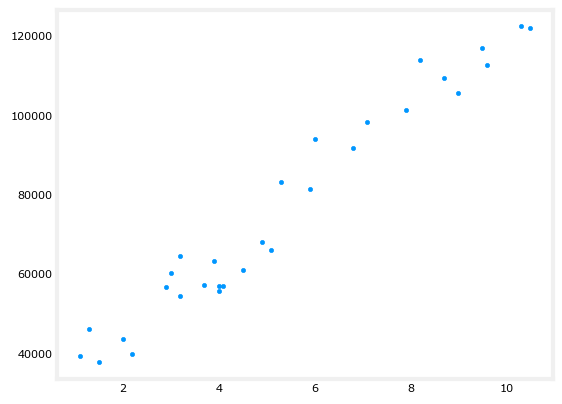

In [28]:
plt.scatter(
    x_train,
    y_train,
    marker = '.',
)
plt.show()

In [29]:
'''
x -> x_train
y -> y_train

w, b -> model parametars
Computing the cost of the model in case selecting parametars (w, b)
'''
def cost_compute(x, y, w, b):

    cost_i , total_cost, n = 0, 0, len(x)

    for i in range(n):
        cost_i = ((w * x[i] + b) - y[i]) ** 2
        total_cost += cost_i
    
    total_cost = total_cost * (1 / (2 * n))

    return total_cost    

In [30]:
'''
Calculate the derivative part of the grediant desent
where:

d_dw_i is result of derivative part in w equation
d_db_i is result of derivative part in b equation

'''

def compute_gradient(x, y, w, b): # just derivative part
    
    n = len(x)
    
    d_dw, d_db = 0, 0
    
    for i in range(n):
        f_wb = w * x[i] + b
        
        d_dw_i = (f_wb - y[i]) * x[i]
        d_db_i = f_wb - y[i]
        
        d_dw += d_dw_i
        d_db += d_db_i
    
    d_db /= n
    d_dw /= n
    return d_dw, d_db


In [31]:


def gradiant_descent(x, y, w_int, b_int, alpha, iterations):

    j_function = [0]
    all_parameters = [0]
    
    w = w_int
    b = b_int
    
    for i in range(iterations + 1):
        
        di_dw, di_db = compute_gradient(x, y,w, b)

        b = b - alpha * di_db
        w = w - alpha * di_dw
    
        j_function.append(cost_compute(x, y, w, b))
        all_parameters.append([w, b])
        if i % 10000 == 0 :
            print(f"iteration {i}:  cost {j_function[-1]}:  w {w}:   b {b}:  d_dw {di_dw}:    d_db {di_db}")

    return w, b, j_function, all_parameters
    

In [32]:
w_init = 0
b_init = 0
iterations = 100000
temp_alpha = 1.0e-2


w_final, b_final, j, par = gradiant_descent(x_train, y_train, w_init, b_init, temp_alpha, iterations)

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

iteration 0:  cost 1344612525.8413548:  w 4773.987:   b 760.03:  d_dw -477398.7:    d_db -76003.0
iteration 10000:  cost 15635475.861140488:  w 9449.962323705007:   b 25792.200183507008:  d_dw 4.769215593114496e-07:    d_db -3.2138513536968577e-06
iteration 20000:  cost 15635475.861140482:  w 9449.96232145521:   b 25792.2001986678:  d_dw 7.639755494892597e-11:    d_db -1.8165640843411285e-10


iteration 30000:  cost 15635475.861140482:  w 9449.96232145521:   b 25792.2001986678:  d_dw 7.639755494892597e-11:    d_db -1.8165640843411285e-10
iteration 40000:  cost 15635475.861140482:  w 9449.96232145521:   b 25792.2001986678:  d_dw 7.639755494892597e-11:    d_db -1.8165640843411285e-10
iteration 50000:  cost 15635475.861140482:  w 9449.96232145521:   b 25792.2001986678:  d_dw 7.639755494892597e-11:    d_db -1.8165640843411285e-10
iteration 60000:  cost 15635475.861140482:  w 9449.96232145521:   b 25792.2001986678:  d_dw 7.639755494892597e-11:    d_db -1.8165640843411285e-10
iteration 70000:  cost 15635475.861140482:  w 9449.96232145521:   b 25792.2001986678:  d_dw 7.639755494892597e-11:    d_db -1.8165640843411285e-10
iteration 80000:  cost 15635475.861140482:  w 9449.96232145521:   b 25792.2001986678:  d_dw 7.639755494892597e-11:    d_db -1.8165640843411285e-10
iteration 90000:  cost 15635475.861140482:  w 9449.96232145521:   b 25792.2001986678:  d_dw 7.639755494892597e-11:    

In [33]:
def calculate_predicted_values(x_train, w, b):
    m = len(x_train)
    f_wb = [0] * m
   
    for i in range(m):
        f_wb[i] = w * x_train[i] + b
    return f_wb
 
f_wb = calculate_predicted_values(x_train, w_final, b_final)

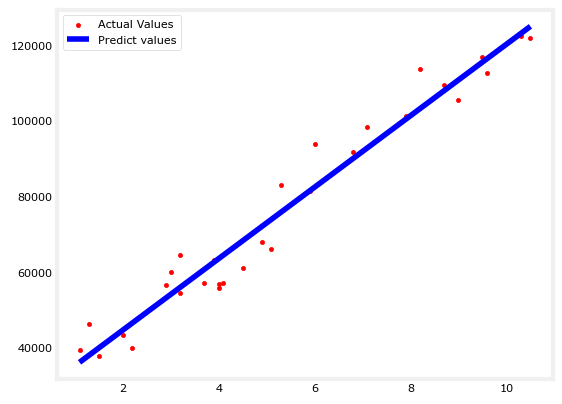

In [34]:
plt.scatter(
    x = x_train,
    y = y_train,
    color='red',
    marker='.',
    label = 'Actual Values'
)

plt.plot(
    x_train,
    f_wb,
    color = 'blue',
    label = 'Predict values'
)

plt.legend()
plt.show()